For dealing with textual data preprocessing, we would be making use of [NLTK](https://www.nltk.org/) library, a leading platform for building Python programs to work with human language data. <br>
One can even refer to the [NLTK Book](https://www.nltk.org/book/) available in thier website, for great knowledge on what all can be done using the library, and about NLP in general.

In [ ]:
%pip install nltk

In [ ]:
%pip install matplotlib

In [45]:
import numpy as np
import math

In [1]:
import nltk, re, pprint
from nltk import word_tokenize

In [2]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer 

## NLTK

Lets look at what all awesome things you can do with NLTK library, and why it is so widely used

Here, we are going to pull & use one of my favorite book as an input dataset, Meditaions by Marcus Aurelius

In [3]:
from urllib import request
url = "https://www.gutenberg.org/files/2680/2680-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [4]:
print(f"Datatype of our file: {type(raw)}")
print(f"Number of characters in our file: {len(raw)}")
print(f"\nA sample look:\n{raw[11000:11650]}")

Datatype of our file: <class 'str'>
Number of characters in our file: 424830

A sample look:
 gods granted their favour, irrespective of right or wrong. In this
case all devout souls were thrown back upon philosophy, as they had
been, though to a less extent, in Greece. There were under the early
empire two rival schools which practically divided the field between
them, Stoicism and Epicureanism. The ideal set before each was
nominally much the same. The Stoics aspired to ἁπάθεια, the repression
of all emotion, and the Epicureans to ἀταραξία, freedom from all
disturbance; yet in the upshot the one has become a synonym of stubborn
endurance, the other for unbridled licence. With Epicureanism we have
nothing to do now; but it 


As we can see, our file, Raw, contains 424830 characters, in String datatype. One of the 1st step we would like to perform in most of our textual preprocessing is, converting the raw string into token, i.e. apply Tokenization process

In [5]:
# Get tokens out of the raw string
from nltk import word_tokenize
tokens = word_tokenize(raw)

print(f"Number of characters in raw string: {len(raw)}")
print(f"Number of tokens available: {len(tokens)}")
print(f"Sample tokens:\n{tokens[:10]}")

Number of characters in raw string: 424830
Number of tokens available: 87758
Sample tokens:
['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'Meditations', ',', 'by', 'Marcus', 'Aurelius']


### Power of NLTK

In [9]:
nltk_text = nltk.Text(tokens)
print(type(nltk_text))
print(f"Occurence of word Wisdom in the corpus:\n")
nltk_text.concordance("wisdom")

<class 'nltk.text.Text'>
Occurence of word Wisdom in the corpus:

Displaying 5 of 5 matches:
less to his own ability than to his wisdom in choice of lieutenants , shown co
who had not attained to the perfect wisdom , certain actions were proper . ( κ
ut successful . With a statesman 's wisdom he foresaw the danger to Rome of th
 also death , a secret of nature 's wisdom : a mixture of elements , resolved 
 as one , whose only study and only wisdom is , to be just in all his actions 


In [12]:
print(f"Occurence of word Duty in the corpus:")
nltk_text.concordance("duty")

Occurence of word Duty in the corpus:
Displaying 15 of 15 matches:
redecessors , seeking only to do his duty as well as he could , and to keep ou
cities done in his name : it was his duty to know , and if he did not he would
to confess that he had failed in his duty . But from his own tone in speaking 
nity of the universe , and on man 's duty as part of a great whole . Public sp
s may help him to bear the burden of duty and the countless annoyances of a bu
e ' ; but it is not the busy life of duty he has in mind so much as the contem
ss , the Roman thought mainly of the duty to be done as well as might be , and
of strenuous weariness ; he does his duty as a good soldier , waiting for the 
which nothing but the stern sense of duty could carry him through . And he did
iscommended or commended thou do thy duty : or whether dying or doing somewhat
 then likewise remember , that every duty that belongs unto a man doth consist
ot unto me particularly as a private duty , I will either give i

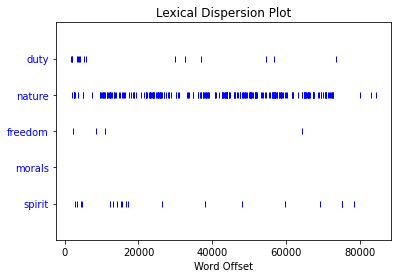

In [13]:
nltk_text.dispersion_plot(["duty", "nature", "freedom", "morals", "spirit"])
# Here, each stripe represents an instance of a word, and each row represents the entire text.

In [14]:
print(f"Count of tokens: {len(tokens)}")
print(f"Count of words in nltk-text: {len(nltk_text)}")
print(f"Count of unique words: {len(set(nltk_text))}")

Count of tokens: 87758
Count of words in nltk-text: 87758
Count of unique words: 7310


In [16]:
# Slicing through the indexes like michael scott doing ice-skating
print(nltk_text[7310:7450])

['to', 'be', 'offended', 'with', 'idiots', ',', 'nor', 'unseasonably', 'to', 'set', 'upon', 'those', 'that', 'are', 'carried', 'with', 'the', 'vulgar', 'opinions', ',', 'with', 'the', 'theorems', ',', 'and', 'tenets', 'of', 'philosophers', ':', 'his', 'conversation', 'being', 'an', 'example', 'how', 'a', 'man', 'might', 'accommodate', 'himself', 'to', 'all', 'men', 'and', 'companies', ';', 'so', 'that', 'though', 'his', 'company', 'were', 'sweeter', 'and', 'more', 'pleasing', 'than', 'any', 'flatterer', "'s", 'cogging', 'and', 'fawning', ';', 'yet', 'was', 'it', 'at', 'the', 'same', 'time', 'most', 'respected', 'and', 'reverenced', ':', 'who', 'also', 'had', 'a', 'proper', 'happiness', 'and', 'faculty', ',', 'rationally', 'and', 'methodically', 'to', 'find', 'out', ',', 'and', 'set', 'in', 'order', 'all', 'necessary', 'determinations', 'and', 'instructions', 'for', 'a', 'man', "'s", 'life', '.', 'A', 'man', 'without', 'ever', 'the', 'least', 'appearance', 'of', 'anger', ',', 'or', 'any

To be noticed, the file we are using, contains a lot of irrelevant data, which adds no value to our goal, and thus we need to remove them

In [17]:
print(f"Length of raw before slicing: {len(raw)}")
begin = raw.find("THE FIRST BOOK")
end = raw.rfind("*** END OF THE PROJECT GUTENBERG EBOOK MEDITATIONS ***")
raw = raw[begin:end]
print(f"Length of raw after slicing: {len(raw)}")

Length of raw before slicing: 424830
Length of raw after slicing: 373500


That's enough of playing with NLTK, now lets get back to work

___

## Which Corpus to use?

One widely used application of NLP is to prepare model of performing sentiment analysis on human readable data <br>
I.e., companies are often interested to know customer's sentiments via thier reviews and feedback, regarding their apps or products <br>
And in order to prepare a robust model who can help the companies to tell the customer's or user's sentiment, we need to feed in sentiment reach data <br>
Here, if we need to prepare a NLP model which works distinguishly extra-ordinary on classifying human sentiments/emotions, i.e. differentiating which text-input conveys which emotion/sentiment, we need to use data which is filled with all the kinds of emotions. And in such a situation, what other place can we think of, if not Twitter?

In twitter, we can find sentiments of joy:
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">I am feeling a bit more positive than I was 2 weeks, counselling and talking and getting advice to solve problem really helps. How is everyone doing</p>&mdash; #Shove racism out of society (@AVFCsangha123) <a href="https://twitter.com/AVFCsangha123/status/1448956202264711168?ref_src=twsrc%5Etfw">October 15, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

We can find grief:
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Just feeling sad because tomorrow is Sunday and then it will be Monday again :(((((</p>&mdash; Giosa Fernandes (@giosafernandes) <a href="https://twitter.com/giosafernandes/status/1370879414989422599?ref_src=twsrc%5Etfw">March 13, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

We can find anger:
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Today I am full of rage.</p>&mdash; Botlett G-S Jr. (@BotlettGSJr) <a href="https://twitter.com/BotlettGSJr/status/672204242703269888?ref_src=twsrc%5Etfw">December 3, 2015</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

And even, boredom:
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">I can&#39;t explain how bored I am right now</p>&mdash; emma (@emmadoherty__) <a href="https://twitter.com/emmadoherty__/status/682667697147133952?ref_src=twsrc%5Etfw">December 31, 2015</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

You got the gist, right? Thus, we would using Twitter corpus available in NLTK library, to train our models, so that the training dataset in sentiment-rich, i.e. abundant of emotions are available. Lets get the data and have a look at it:

In [18]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [19]:
# downloads the twitter corpus
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\jaspr\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

Our corpus comes with labeled data, i.e. Positive and Negative tweets are already distictly available, so next we would separating them

In [20]:
# select the set of positive and negative tweets
tweets_positive = twitter_samples.strings('positive_tweets.json')
tweets_negative = twitter_samples.strings('negative_tweets.json')

Lets look at how much data do we have at hand

In [23]:
print('Number of positive tweets: ', len(tweets_positive))
print('Number of negative tweets: ', len(tweets_negative))

print('\nThe data-type of tweets_positive variable is: ', type(tweets_positive))
print('The data-type of tweets_negative variable is: ', type(tweets_negative))

Number of positive tweets:  5000
Number of negative tweets:  5000

The data-type of tweets_positive variable is:  <class 'list'>
The data-type of tweets_negative variable is:  <class 'list'>


We have got 1k tweets, as list of strings, which are 5k positive tweets and 5k negative tweets <br>
Lets peek at some random sample data

In [24]:
import random
random_index = random.randint(0,15) #Return random integer in range [a, b], including both end points
print(f"Random positive tweet: {tweets_positive[random_index]}")
print(f"Random negative tweet: {tweets_negative[random_index]}")

Random positive tweet: @Mish23615351  follow @jnlazts &amp; http://t.co/RCvcYYO0Iq follow u back :)
Random negative tweet: @SophiaMascardo happy trip, keep safe. see you soon :* :(


## Steps involved in Textual Data Preprocessing :
We are ready to apply our preprocessing steps to the data. We would applying following essential data preprocessing:
- Removing noise
- Tokenizing the string
- Lowercasing
- Removing stop words and punctuation
- Stemming
** <i>If wondering what does all these mean, definition and meaning of all these terms have been explained in previous chapter, visit them, if not already gone through</i>

### Removing Noise
Noise is the part of our data, which adds no value, e.g. For sentiment analysis usecase userids, dates, links, etc. contribute no useful information<br>
So we will begin with their removal fist

In [27]:
def remove_tweet_noise(tweet_list):
    tweets_noise_reduction_1 = [re.sub(r'^RT[\s]+', '', item) for item in tweet_list] # Removing "RT" text from the tweets
    tweets_noise_reduction_2 = [re.sub(r'https?:\/\/.*[\r\n]*', '', item) for item in tweets_noise_reduction_1] # Removing hyperlinks
    tweets_noise_reduction_3 = [re.sub(r'#', '', item) for item in tweets_noise_reduction_2] # removing hashtag symbol
    tweets_noise_reduction_4 = [re.sub(r'@[A-Za-z0-9]+', '',item) for item in tweets_noise_reduction_3] # removing userids
    print(f"Sample tweet post treatment:\n{tweets_noise_reduction_4[random.randint(1,100)]}")
    return tweets_noise_reduction_4

In [28]:
tweets_positive = remove_tweet_noise(tweets_positive)
tweets_negative = remove_tweet_noise(tweets_negative)

Sample tweet post treatment:
  follow  &amp; 
Sample tweet post treatment:
So much misses :-( 


### Tokenizing the string

In [30]:
from nltk.tokenize import TweetTokenizer

In [31]:
def tokenize_tweets(tweet_list):
    # instantiate tokenizer class
    nltk_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = [nltk_tokenizer.tokenize(item) for item in tweets_positive]
    return tokens
    
# tokenize tweets
tweets_positive_tokens = tokenize_tweets(tweets_positive)
tweets_negative_tokens = tokenize_tweets(tweets_negative)

print('Tokenized string:')
print(tweets_negative_tokens[:5])

Tokenized string:
[['followfriday', '_inte', '_paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['hey', 'james', '!', 'how', 'odd', ':/', 'please', 'call', 'our', 'contact', 'centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'many', 'thanks', '!'], ['we', 'had', 'a', 'listen', 'last', 'night', ':)', 'as', 'you', 'bleed', 'is', 'an', 'amazing', 'track', '.', 'when', 'are', 'you', 'in', 'scotland', '?', '!'], ['congrats', ':)'], ['yeaaah', 'yipppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']]


### Lowercasing

In [32]:
def lowercase_tweets(tweet_list):
    case_converted = [word.lower() for tweet in tweet_list for word in tweet]
    print(f"Sample tweet post treatment:\n{case_converted[random.randrange(5,15,1)]}")
    return case_converted

In [33]:
# lowercase tweets
tweets_positive_case_transformed = lowercase_tweets(tweets_positive_tokens)
tweets_negative_case_transformed = lowercase_tweets(tweets_negative_tokens)

Sample tweet post treatment:
:)
Sample tweet post treatment:
my


### Removing stop words and punctuation

In [34]:
from nltk.corpus import stopwords
stopwords_english = stopwords.words('english') 
print(f"Example of Stop Words: {stopwords_english[:5]}")
print(f"Example of Punctuation: {string.punctuation}")

Example of Stop Words: ['i', 'me', 'my', 'myself', 'we']
Example of Punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [35]:
def remove_stop_words(tweets_list):
    clean_tweets = []
    
    # Now we will pick only those tokens, which don't fall under the category of stopwords & punctuations marks
    for word in tweets_list: # Go through every word in your tokens list
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation): # remove punctuation
            clean_tweets.append(word)
    return clean_tweets

In [36]:
tweets_positive_cleaned = remove_stop_words(tweets_positive_case_transformed)
tweets_negative_cleaned = remove_stop_words(tweets_negative_case_transformed)

### Stemming
*** <i>definitions provided in previous chapter</i>

In [37]:
def tweet_stemming(tweets_lists):
    # Instantiate stemming class
    stemmer = PorterStemmer() 
    
    # Create an empty list to store the stems
    tweets_stemed = [] 

    for word in tweets_lists:
        stem_word = stemmer.stem(word)  # stemming word
        tweets_stemed.append(stem_word)  # append to the list
    return tweets_stemed

In [38]:
tweets_positive_stemmed = tweet_stemming(tweets_positive_cleaned)
tweets_negative_stemmed = tweet_stemming(tweets_negative_cleaned)

## Data Preparation

In [40]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = tweets_positive_stemmed[4000:]
train_pos = tweets_positive_stemmed[:4000]
test_neg = tweets_negative_stemmed[4000:]
train_neg = tweets_negative_stemmed[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

Creating 1-0 label for +ve & -ve class, respectively

In [43]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [44]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (60916, 1)


### Logistic Regression
* The sigmoid function is defined as: 

$\large h(z) = \frac{1}{1+\exp^{-z}} $

It maps the input 'z' to a value that ranges between 0 and 1, and so it can be treated as a probability.

In [47]:
from math import exp
def sigmoid(z):
    h = 1/(1+exp(-z))
    return h

In [48]:
# Testing your function 
if (sigmoid(0) == 0.5):
    print('SUCCESS!')
else:
    print('Oops!')

SUCCESS!


Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression:
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Note that the $\theta$ values are "weights". If you took the Deep Learning Specialization, we referred to the weights with the `w` vector.  In this course, we're using a different variable $\theta$ to refer to the weights.

Logistic regression
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
We will refer to 'z' as the 'logits'.

### Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

$$\large J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.

The loss function for a single training example is
$$\large Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label $y$ is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss.

In [49]:
# verify that when the model predicts close to 1, but the actual label is 0, the loss is a large positive value
-1 * (1 - 0) * np.log(1 - 0.9999) # loss is about 9.2

9.210340371976294

* Likewise, if the model predicts close to 0 ($h(z) = 0.0001$) but the actual label is 1, the first term in the loss function becomes a large number: $-1 \times log(0.0001) \approx 9.2$.  The closer the prediction is to zero, the larger the loss.

In [50]:
# verify that when the model predicts close to 0 but the actual label is 1, the loss is a large positive value
-1 * np.log(0.0001) # loss is about 9.2

9.210340371976182

#### Update the weights

To update your weight vector $\theta$, you will apply gradient descent to iteratively improve your model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\large \theta_j$ is:

$$\large \nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x^{(i)}_j $$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\large \theta_j$, so $x^{(i)}_j$ is the feature associated with weight $\large \theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\large \alpha$:
$$\large \theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\large \alpha$ is a value that we choose to control how big a single update will be

## Instructions: Implement gradient descent function
* The number of iterations `num_iters` is the number of times that you'll use the entire training set.
* For each iteration, you'll calculate the cost function using all training examples (there are `m` training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1) 
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$